In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import urllib.request as urllib, zipfile, os
import os
df_orders = pd.read_pickle('orders.pkl')

In [2]:
df_orders.head()

,Customer number,DoB,Gender,City,Order number,Order date,Product number,Sub category,Category,Count,...,Reason of return,Rating,Additional,Age at time of purchase,Season,Total price,Age category,2-pack,Difference delivery time,Never delivered
0,1063418,1988-07-25,Woman,Bloemendaal,1251137,2014-12-20,5146308036084,Garden chairs,Garden furniture,1,...,NaN,-1,False,26,Winter,1090.82,Adult,False,0,False
1,1062078,1973-05-31,Man,De Bilt,1658762,2017-11-03,8119187109467,Torches,Garden heating,6,...,NaN,-1,False,44,Autumn,2315.52,Adult,False,0,False
2,1007060,1963-11-25,Man,Doetinchem,106526,2013-06-08,6110364066490,Leaf blowers,Garden reamers,2,...,No reason given,-1,False,49,Summer,347.56,Adult,False,-4,True
3,1063418,1988-07-25,Woman,Bloemendaal,1251137,2014-12-20,8172375031575,Hoes,Garden hand tools,4,...,Article is defect,-1,False,26,Winter,182.56,Adult,False,-6,True
4,1063290,1984-03-31,Woman,Franekeradeel,439149,2015-01-06,8111132296154,Insects and vermin,Control,1,...,NaN,-1,False,30,Winter,114.24,Adult,False,0,False


In [6]:
df_orders.dtypes

Customer number                      int64
DoB                         datetime64[ns]
Gender                              object
City                                object
Order number                         int64
Order date                  datetime64[ns]
Product number                      object
Sub category                        object
Category                            object
Count                                int64
Price                              float64
Expected delivery time               int64
Actual delivery time                 int64
Reason of return                    object
Rating                               int64
Additional                            bool
Age at time of purchase              int64
Season                              object
Total price                        float64
Age category                        object
2-pack                                bool
Difference delivery time             int64
Never delivered                       bool
G          

In [90]:
 order = df_orders.groupby('Order date')['Count'].count().reset_index()
# order = df_orders['Count'].count()
 order

,Order date,Count
0,2013-01-01,3800
1,2013-01-02,2793
2,2013-01-03,3999
3,2013-01-04,2302
4,2013-01-05,2240
5,2013-01-06,666
6,2013-01-07,3690
7,2013-01-08,3225
8,2013-01-09,959
9,2013-01-10,1201


In [91]:
from datetime import datetime
# df_orders['Order date']
order = order.set_index('Order date')
order.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2018-11-09', '2018-12-01', '2018-12-02', '2018-12-03',
               '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07',
               '2018-12-08', '2018-12-09'],
              dtype='datetime64[ns]', name='Order date', length=2126, freq=None)

In [92]:
#  y = pd.to_datetime(df_orders['Order number'], errors='coerce')
y = order['Count'].resample('MS').mean()


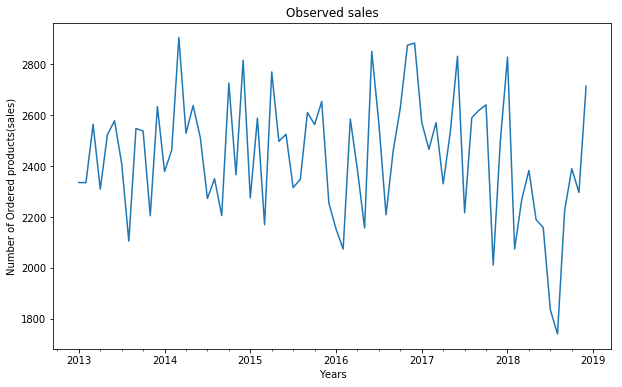

In [94]:
y.plot(figsize=(10, 6))
plt.title('Observed sales')
plt.xlabel('Years')
plt.ylabel('Number of Ordered products(sales)')
plt.show()

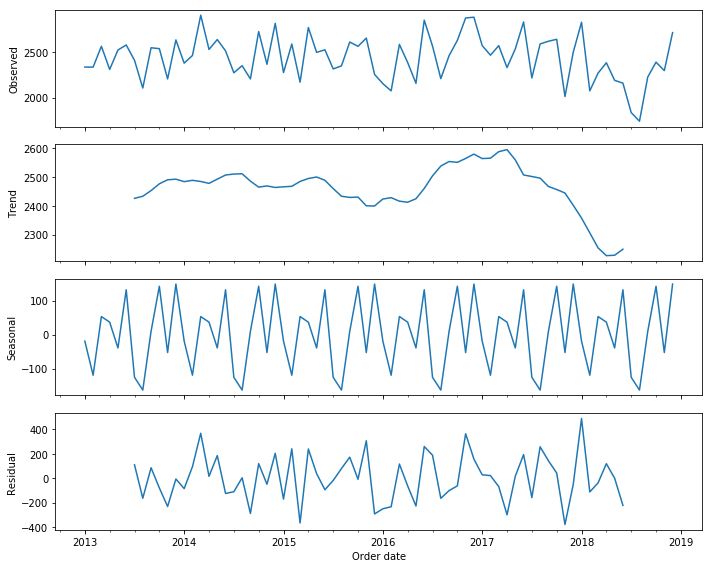

In [95]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['axes.formatter.useoffset']=False
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [97]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('p, d, q parameters account for seasonality, trend, and noise in data:')


p, d, q parameters account for seasonality, trend, and noise in data:


In [98]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

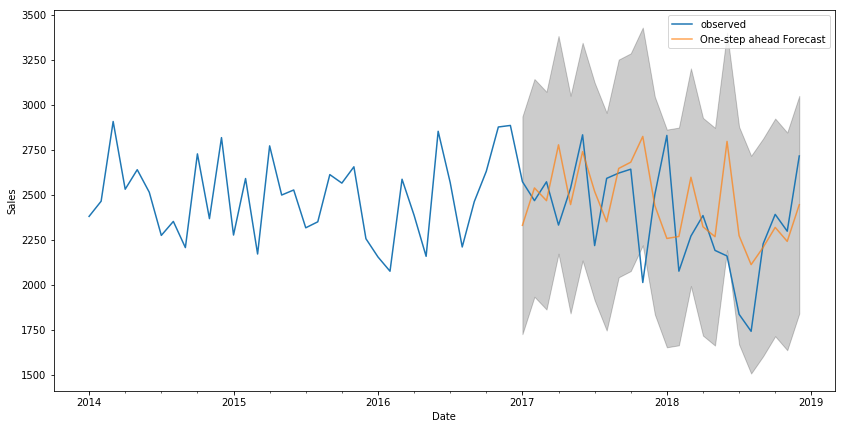

In [99]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

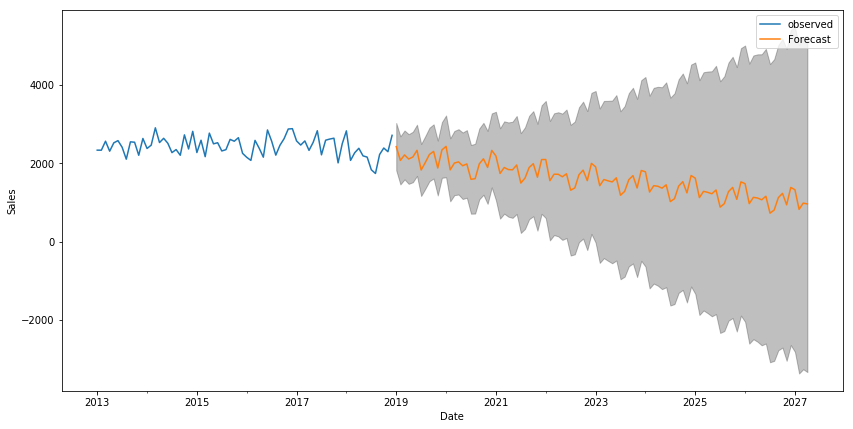

In [100]:
# results.plot_diagnostics(figsize=(16, 8))
# plt.show()
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

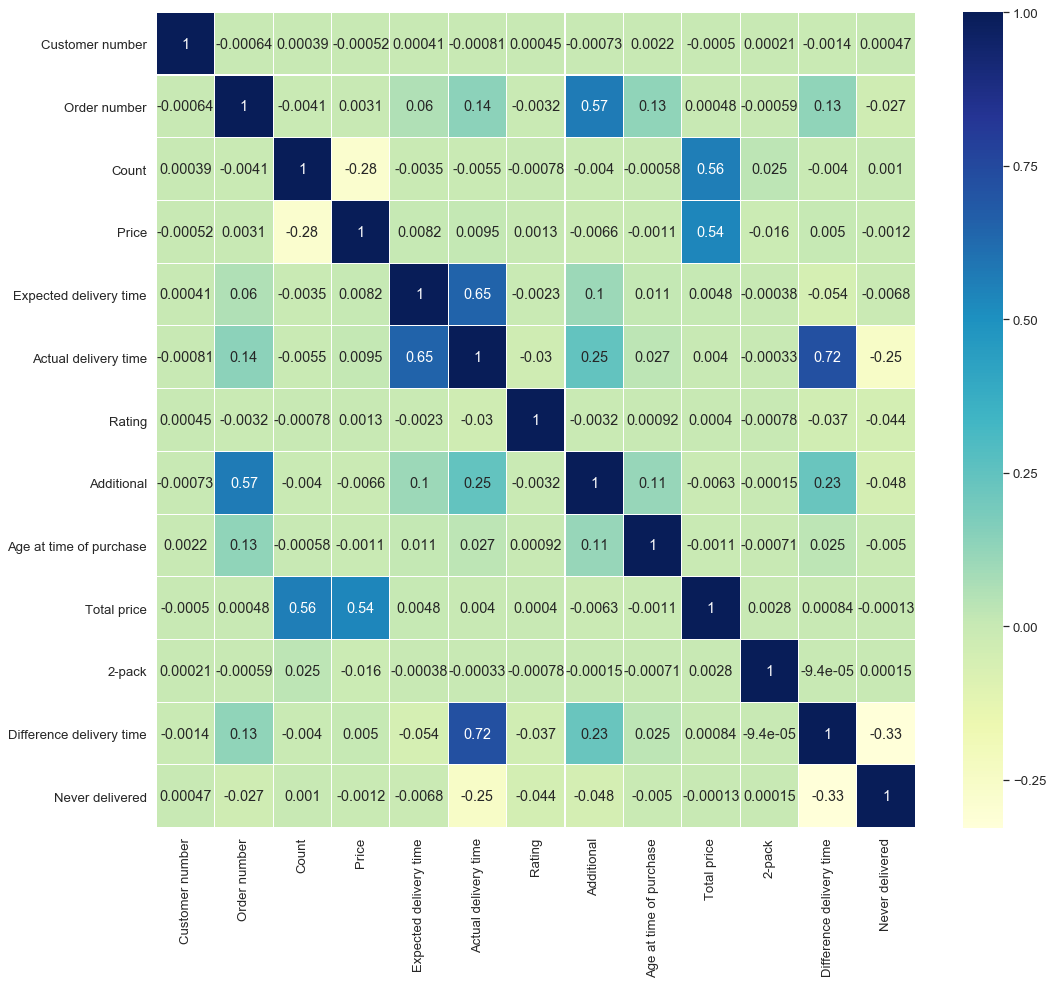

In [8]:
# df=df_orders.drop(["veil-type"],axis=1)
import seaborn as sns;sns.set(font_scale=1.2)
plt.figure(figsize=(17,15))
sns.heatmap(df_orders.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

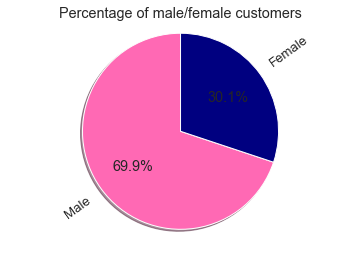

In [9]:
count_orders_male = df_orders['Gender'].str.count('Man')
count_orders_female = df_orders['Gender'].str.count('Woman')

pie_values = [count_orders_male.sum(), count_orders_female.sum()]
pie_labels = 'Male', 'Female'

plt.pie(pie_values, labels=pie_labels, autopct='%1.1f%%', shadow=True, startangle=90, rotatelabels=True, colors = {'navy', 'hotpink'})

plt.axis('equal')

plt.title('Percentage of male/female customers')
plt.show()

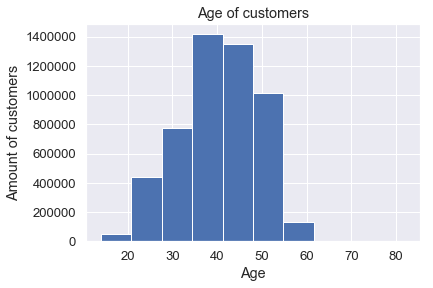

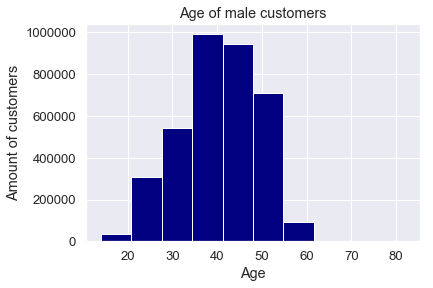

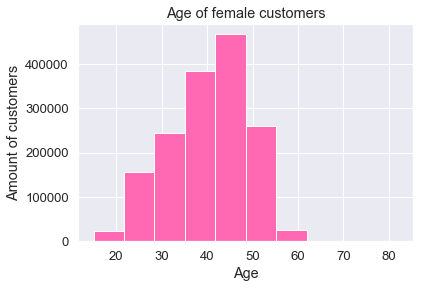

In [12]:
df_orders['Age at time of purchase'].hist()
plt.title('Age of customers')
plt.xlabel('Age')
plt.ylabel('Amount of customers')
plt.show()

df_orders[df_orders['Gender'] == 'Man']['Age at time of purchase'].hist(color = 'navy')
plt.title('Age of male customers')
plt.xlabel('Age')
plt.ylabel('Amount of customers')
plt.show()

df_orders[df_orders['Gender'] == 'Woman']['Age at time of purchase'].hist(color = 'hotpink')
plt.title('Age of female customers')
plt.xlabel('Age')
plt.ylabel('Amount of customers')
plt.show()

<BarContainer object of 12 artists>

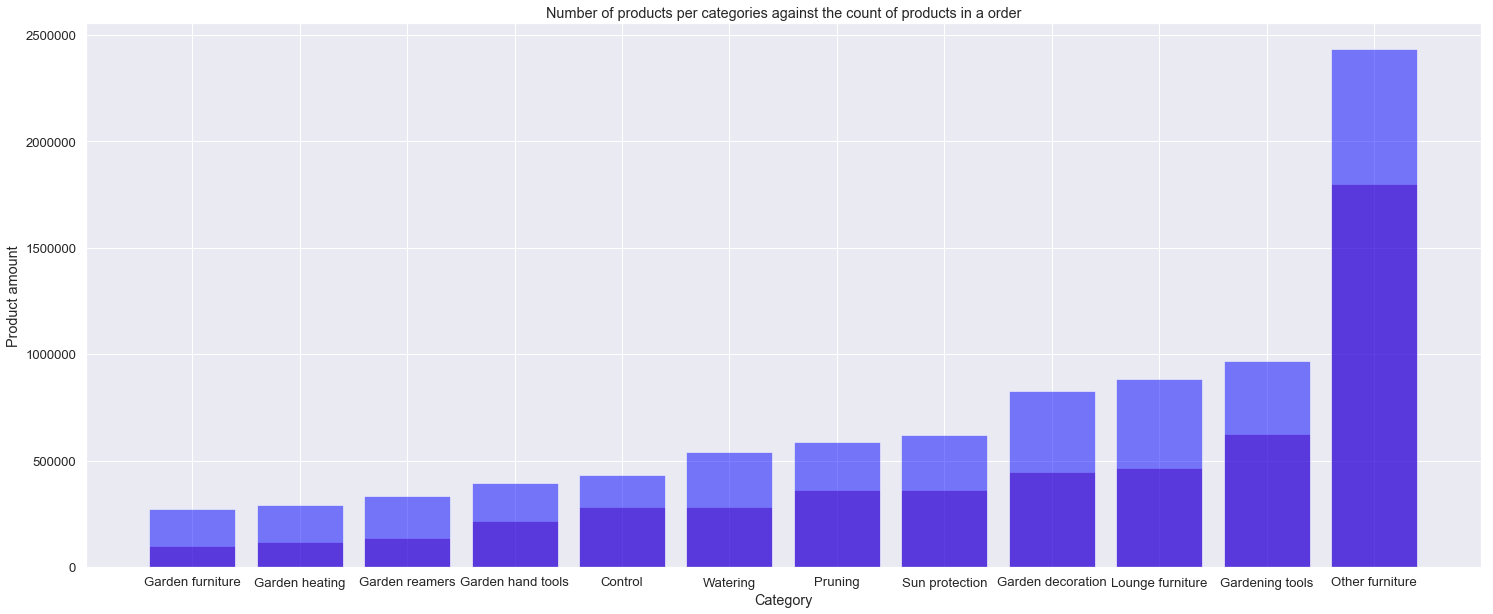

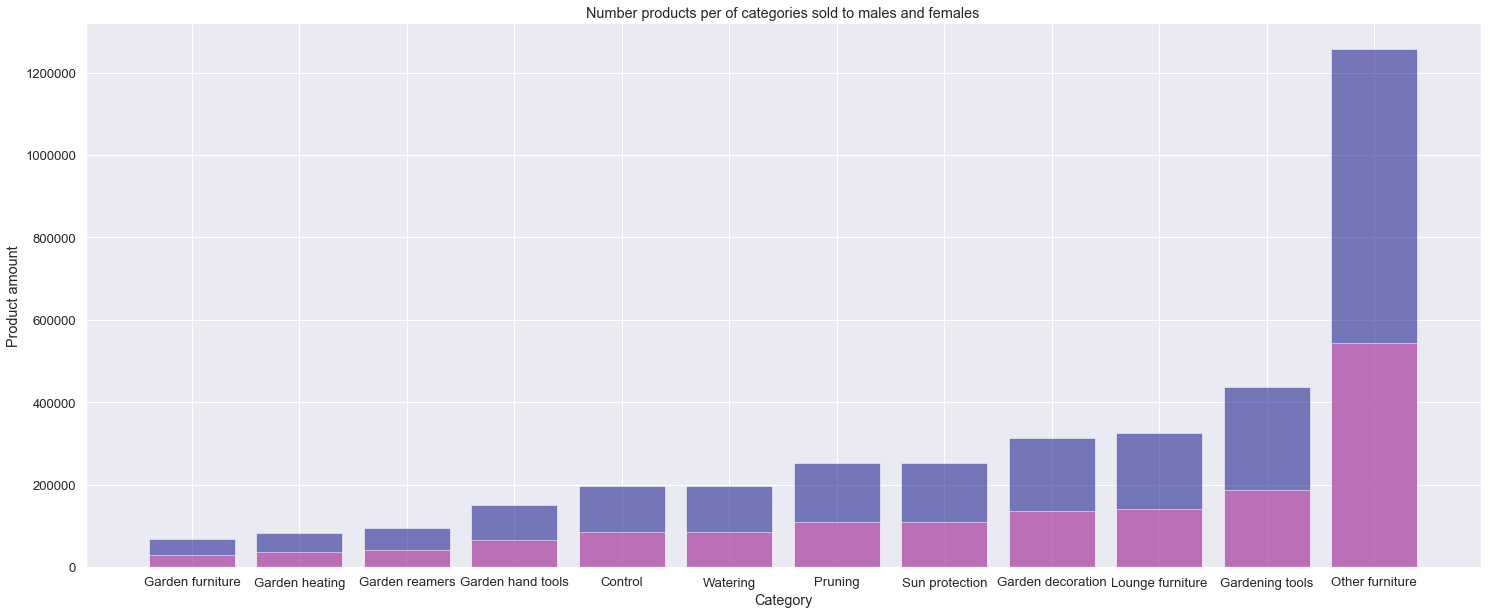

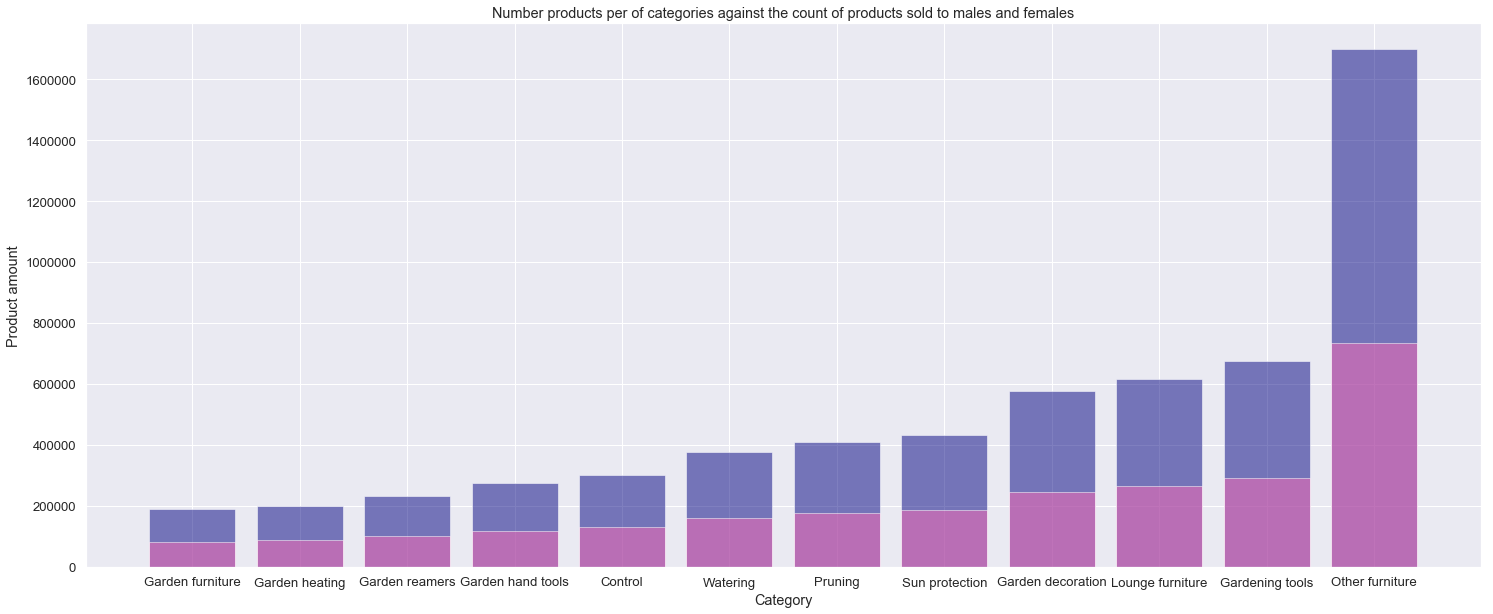

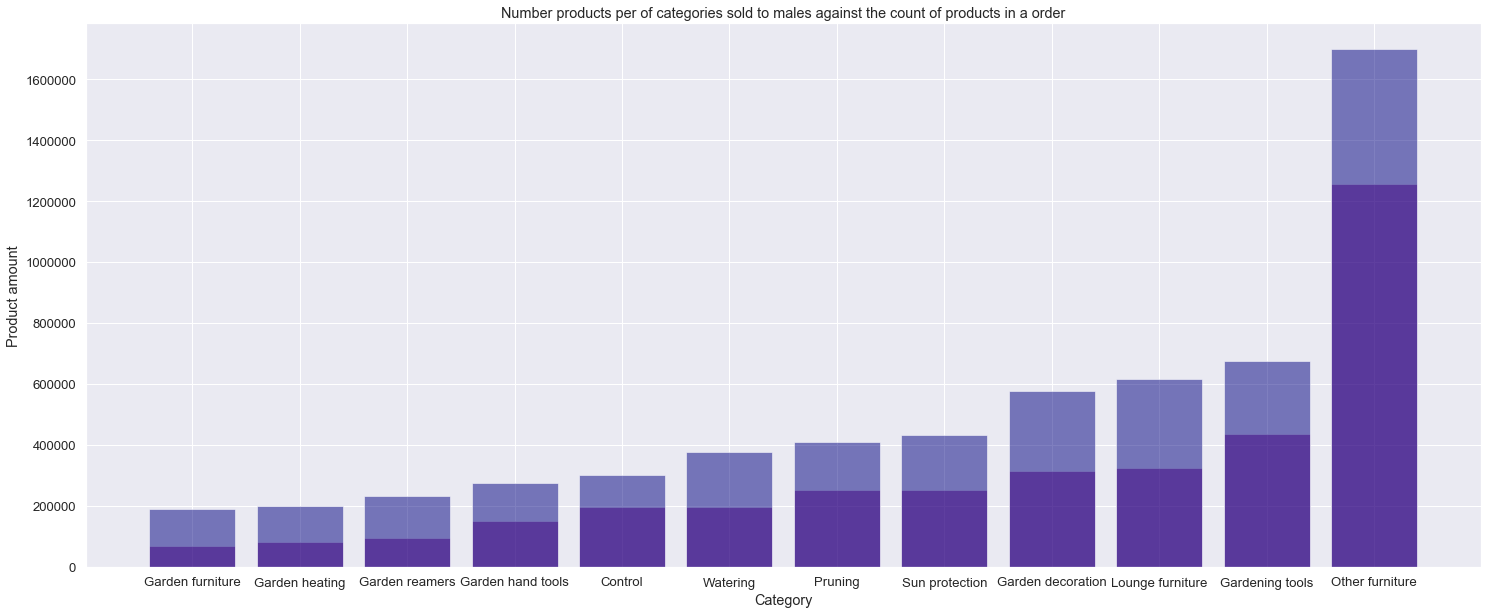

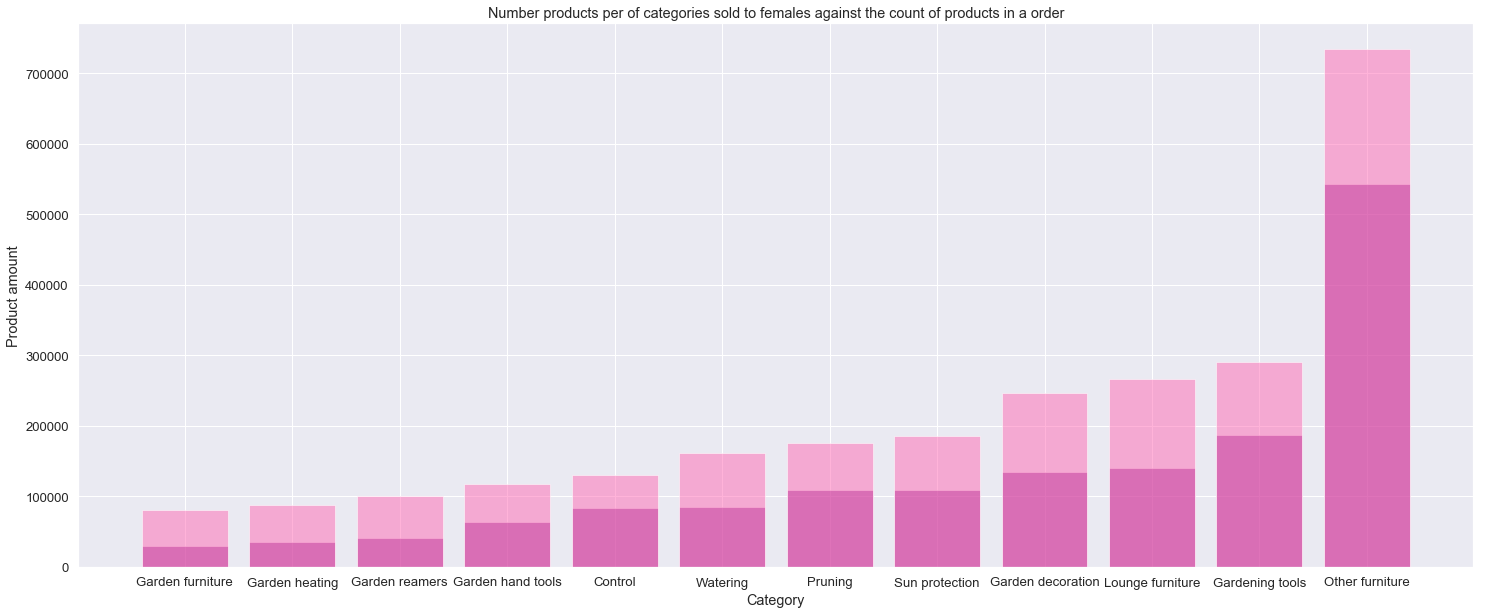

In [15]:
#print((pd.Series((optimized_df_orders['Count'].where(optimized_df_orders['Category'] == category).sum().astype(int) for category in optimized_df_orders['Category'].unique()), index = optimized_df_orders['Category'].unique())).sort_values(ascending = False))

#print(optimized_df_orders['Category'].value_counts())

plt.figure(figsize=[25,10])
plt.title('Number of products per categories against the count of products in a order')
plt.xlabel('Category')
plt.ylabel('Product amount')
plt.bar(df_orders['Category'].unique(), df_orders['Category'].value_counts().sort_values(), alpha=0.5, color = 'purple')
plt.bar(df_orders['Category'].unique(), pd.Series((df_orders['Count'].where(df_orders['Category'] == category).sum().astype(int) for category in df_orders['Category'].unique())).sort_values(), alpha = 0.5, color = 'blue')

plt.figure(figsize=[25,10])
plt.title('Number products per of categories sold to males and females')
plt.xlabel('Category')
plt.ylabel('Product amount')
plt.bar(df_orders['Category'].unique(), df_orders[df_orders['Gender'] == 'Man']['Category'].value_counts().sort_values(), alpha=0.5, color = 'navy')
plt.bar(df_orders['Category'].unique(), df_orders[df_orders['Gender'] == 'Woman']['Category'].value_counts().sort_values(), alpha=0.5, color = 'hotpink')

plt.figure(figsize=[25,10])
plt.title('Number products per of categories against the count of products sold to males and females')
plt.xlabel('Category')
plt.ylabel('Product amount')
plt.bar(df_orders['Category'].unique(), pd.Series((df_orders['Count'].where((df_orders['Category'] == category) & (df_orders['Gender'] == 'Man')).sum().astype(int) for category in df_orders['Category'].unique())).sort_values(), alpha=0.5, color = 'navy')
plt.bar(df_orders['Category'].unique(), pd.Series((df_orders['Count'].where((df_orders['Category'] == category) & (df_orders['Gender'] == 'Woman')).sum().astype(int) for category in df_orders['Category'].unique())).sort_values(), alpha=0.5, color = 'hotpink')

plt.figure(figsize=[25,10])
plt.title('Number products per of categories sold to males against the count of products in a order')
plt.xlabel('Category')
plt.ylabel('Product amount')
plt.bar(df_orders['Category'].unique(), df_orders[df_orders['Gender'] == 'Man']['Category'].value_counts().sort_values(), alpha=0.5, color = 'purple')
plt.bar(df_orders['Category'].unique(), pd.Series((df_orders['Count'].where((df_orders['Category'] == category) & (df_orders['Gender'] == 'Man')).sum().astype(int) for category in df_orders['Category'].unique())).sort_values(), alpha=0.5, color = 'navy')


plt.figure(figsize=[25,10])
plt.title('Number products per of categories sold to females against the count of products in a order')
plt.xlabel('Category')
plt.ylabel('Product amount')
plt.bar(df_orders['Category'].unique(), df_orders[df_orders['Gender'] == 'Woman']['Category'].value_counts().sort_values(), alpha=0.5, color = 'purple')
plt.bar(df_orders['Category'].unique(), pd.Series((df_orders['Count'].where((df_orders['Category'] == category) & (df_orders['Gender'] == 'Woman')).sum().astype(int) for category in df_orders['Category'].unique())).sort_values(), alpha=0.5, color = 'hotpink')

In [17]:
df_orders.sort_values(by=['Order date'])

print(type(df_orders['Order date'][0]))
df_orders['Order date'] = pd.to_datetime(df_orders['Order date'], format="%Y%m%d:%H:%M:%S.%f")
print(type(df_orders['Order date'][0]))
df_orders.sort_values(by=['Order date'])

print(df_orders['Order date'][0])

# result = pd.merge(df_cities, df_orders, on='City', how='inner')

# city_population_count = result["Lower city"].value_counts()

# print(city_population_count)

# result = result.drop_duplicates("Lower city")

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
0   2014-12-20
0   2018-01-30
Name: Order date, dtype: datetime64[ns]


In [5]:
dutch_cities =df_orders[df_orders['Country'] == 'nl']
print(dutch_cities)
dutch_cities = dutch_cities[dutch_cities['Latitude'] >= 30]

print(dutch_cities)

plt.figure(figsize=[20,20])

plt.subplot(1,2,1)
plt.scatter(dutch_cities.Longitude, dutch_cities.Latitude)

plt.subplot(1,2,2)
plt.scatter(result.Longitude, result.Latitude)

plt.show()

NameError: name 'df_cities' is not defined

In [ ]:
#result['Frequency'] = result.groupby('City')['City'].transform('count')
#result = result.drop_duplicates('City','first',False)

print(result.Frequency)

print("this was the result.Frequency")

plt.figure(figsize=[20,20])

plt.subplot(1,2,1)
plt.scatter(dutch_cities.Longitude, dutch_cities.Latitude)

plt.subplot(1,2,2)
plt.scatter(result.Longitude, result.Latitude, (result.Frequency*result.Frequency)*10)

plt.show()

print(result)

In [18]:
df_loyal=df_orders.groupby(['Customer number', 'Gender']).size()
df_loyal


Customer number  Gender
1004532          Man        49
1004533          Man        82
1004534          Man        83
1004535          Man        66
1004536          Woman      61
1004537          Man        50
1004538          Man        53
1004539          Woman      66
1004540          Man        52
1004541          Woman      80
1004542          Man        65
1004543          Woman      73
1004544          Man        80
1004545          Woman      87
1004546          Woman      32
1004547          Woman      56
1004548          Man        78
1004549          Man        56
1004550          Man        74
1004551          Man        74
1004552          Man        57
1004553          Man        69
1004554          Woman      63
1004555          Man        47
1004556          Man        69
1004557          Man        73
1004558          Man        40
1004559          Man        66
1004560          Man        77
1004561          Man        49
                          ... 
1080338        

In [ ]:
df_loyal.plot.bar()

In [ ]:
df_orders.groupby(['Customer number','Gender']).size().unstack(fill_value=0).plot.bar()

In [ ]:
# pd.crosstab(df['Gender'],df['Customer number']).plot.bar()

In [ ]:
#check th
# df_loyal.Columns=DataFrame.duplicated(subset="Customer number", keep='first')
# df_loyal= df_orders.groupby(df_orders.'Customer number'.tolist(),as_index=False).size()
# df_loyal=df_orders.groupby(['Customer number', 'Gender']).size().value_counts()
# df_loyal
fig=plt.figure(figsize=[25,25])
ax=fig.gca()
df_loyal.plot.bar(ax=ax)
ax.set_title("Duplicated=True")
ax.set_ylabel("Number of Cust")
ax.set_xlabel("TypeCust")
# fig=plt.figure(figsize=[15,15])
# ax=fig.gca()
# df_Emp[['EmployeeID','department_name']].boxplot(by='department_name',ax=ax)
# #count_per_dept.plot.bar(ax=ax)
# ax.set_title("Departments")
# ax.set_ylabel("Number of workers")
# ax.set_xlabel("Departments")


Text(0.5,0,'TypeEmp')

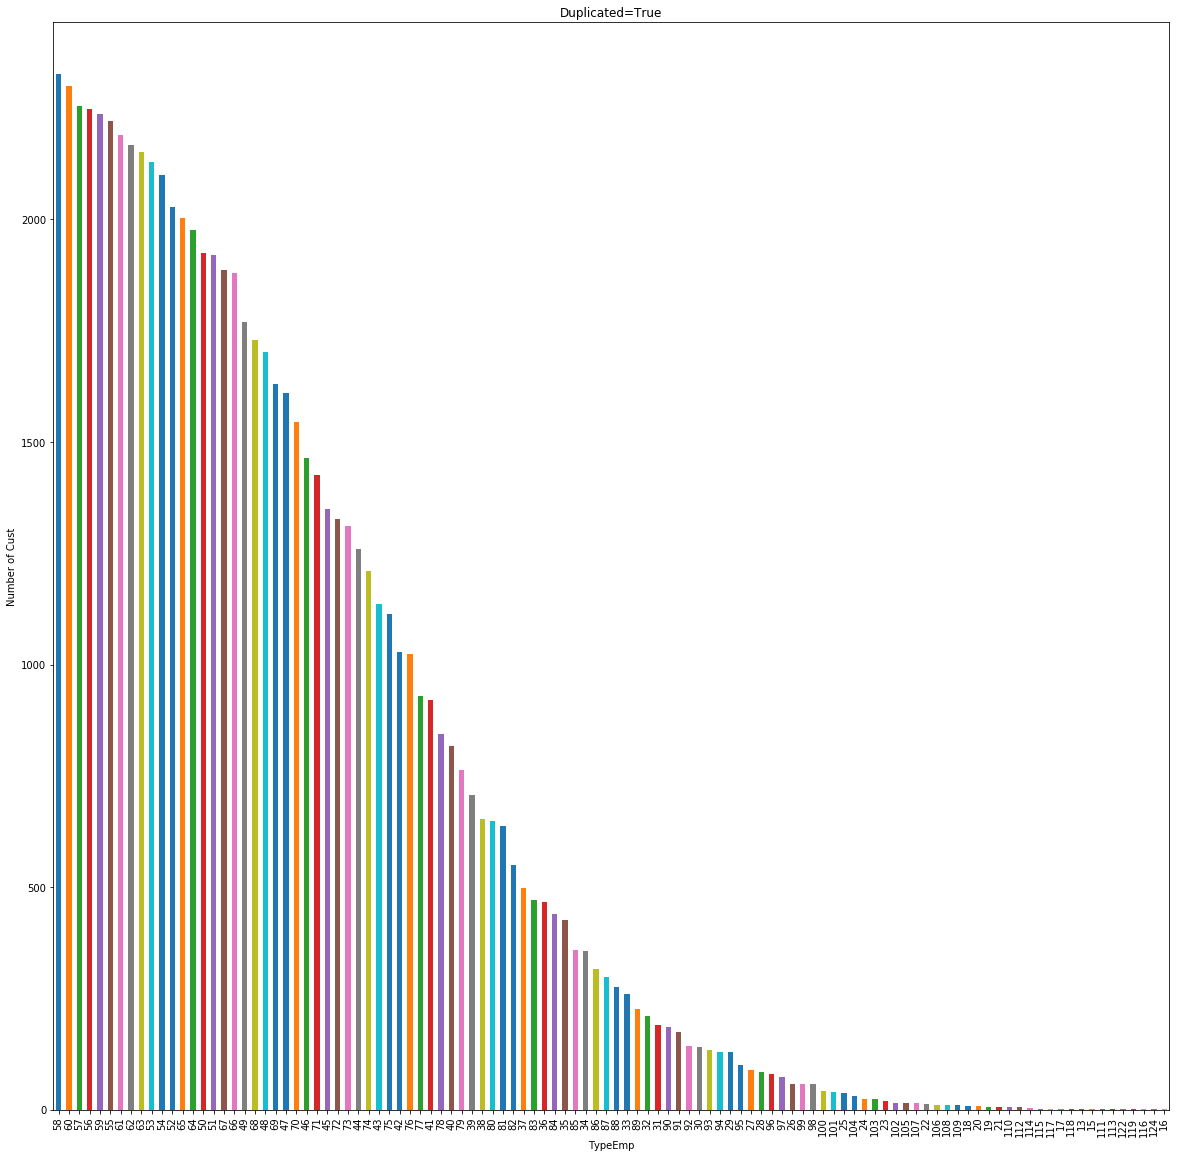

In [36]:
# count=df['Customer number'].value_counts()
df_female = df_orders.groupby(['Customer number']).size().value_counts()
count=df_female['Gender'].value_counts()
fig=plt.figure(figsize=[20,20])
ax=fig.gca()
df_female.plot.bar(ax=ax)
ax.set_title("Duplicated=True")
ax.set_ylabel("Number of Cust")
ax.set_xlabel("TypeEmp")

In [28]:
delivery = df_orders[df_orders['Actual delivery time'] == 1]
not_delivered = df_orders[df_orders['Actual delivery time'] == -1]

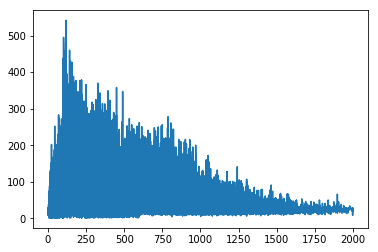

In [6]:
df_orders[df_orders['Price'] < 2000]['Price'].value_counts().sort_index().plot.line()


 the x xais is a seaborn kdeplot is the variable being plotted (in this case, price), while the y axis is how often it occurs.

count shows the number of times orders were made by customers
expensive products with price around 2000 have been ordered only once 

In [49]:
# # df_optimized
# import seaborn as sns
# sns.pairplot(df_orders)
Adults = ['Adult']

Children = ['Child']

Sceniors = ['Senior']

Youth = ['Youth']
# Check all jobs were entered into the categories
total = len(Adults) + len(Children) + len(Youth) + len(Sceniors)
print('Total :', total, 'out of 4')

Total : 4 out of 4


In [50]:
df_orders['copy_age_category']=df_orders['Age category']
df_orders.copy_age_category = df_orders.copy_age_category.replace(Adults, 0)
df_orders.copy_age_category = df_orders.copy_age_category.replace(Children, 1)
df_orders.copy_age_category = df_orders.copy_age_category.replace(Sceniors, 2)
df_orders.copy_age_category = df_orders.copy_age_category.replace(Youth, 3)

# Check that the replacement went to plan
df_orders.copy_age_category.value_counts()

0    4953509
3     228531
2       3339
1          2
Name: copy_age_category, dtype: int64

In [13]:
# from pandas.plotting import parallel_coordinate
# df_orders.drop(['Age category'], axis=1)
# pd.plotting.parallel_coordinates(df_orders,"Actual delivery time",colormap='Blues')

In [2]:
df_orders['new_age'] = df_orders['Age category'].map( {'Adult': 0, 'Youth': 1,'Senior':2,'Child':3} ).astype(int)
# df_orders.head(3)

In [80]:
df_orders['new_age'].unique()

array([0, 1, 2, 3], dtype=int64)

In [44]:
df_orders['Age category'].unique()

array(['Adult', 'Youth', 'Senior', 'Child'], dtype=object)

In [3]:
df_orders["Gender"].unique()

array(['Woman', 'Man'], dtype=object)

In [3]:

df_orders['G'] = df_orders['Gender'].map( {'Woman': 1, 'Man': 0} ).astype(int)


In [ ]:
df_orders['Age category'].hist()
plt.title('Age of customers')
plt.xlabel('Age')
plt.ylabel('Amount of customers')
plt.show()


# KNN

In [4]:

X = df_orders[['G','Count']]

y = df_orders['new_age']

In [6]:
X.head()

,G,Age at time of purchase,Count
0,1,26,1
1,0,44,6
2,0,49,2
3,1,26,4
4,1,30,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#split data into trainnig and test although above defined training and test data can be used 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)
#prints the shape of training and test data and adding cross validation
kf = KFold(n_splits=10,random_state=0)
kf.get_n_splits(X_train,y_train) 
print(kf)
print('Train shape:', X_train.shape, y_train.shape)
print('Test shape:', X_test.shape, y_test.shape)

KFold(n_splits=10, random_state=0, shuffle=False)
Train shape: (3629766, 2) (3629766,)
Test shape: (1555615, 2) (1555615,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
# k_range = list(range(1, 31))

error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) # avrage error rate were not equal to the actual


Text(0,0.5,'Error Rate')

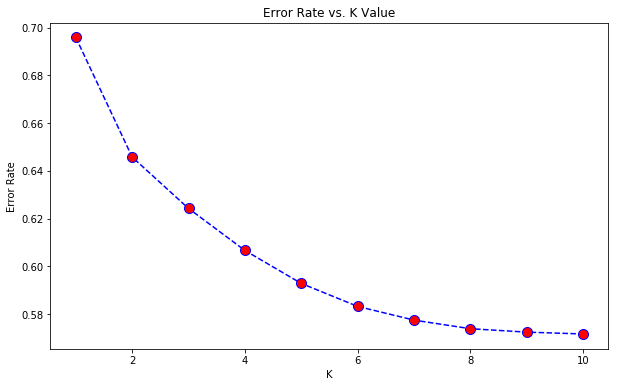

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train,y_train)


In [10]:
Knnpred = knn.predict(X_test)
Knnpred

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
from sklearn import metrics
metrics.accuracy_score(y_test,Knnpred)

0.9998277208692382

In [12]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test,Knnpred))
print('K value 10 has yielded the best accurace rate')

             precision    recall  f1-score   support

          0       1.00      1.00      1.00   1486387
          1       1.00      1.00      1.00     68244
          2       1.00      0.89      0.94       984

avg / total       1.00      1.00      1.00   1555615

K value 10 has yielded the best accurace rate


In [13]:
#confusion matrix
from sklearn.metrics import confusion_matrix
Knn_matrix=confusion_matrix(y_test,Knnpred)
Knn_matrix



array([[1486376,      11,       0],
       [    150,   68094,       0],
       [    107,       0,     877]], dtype=int64)

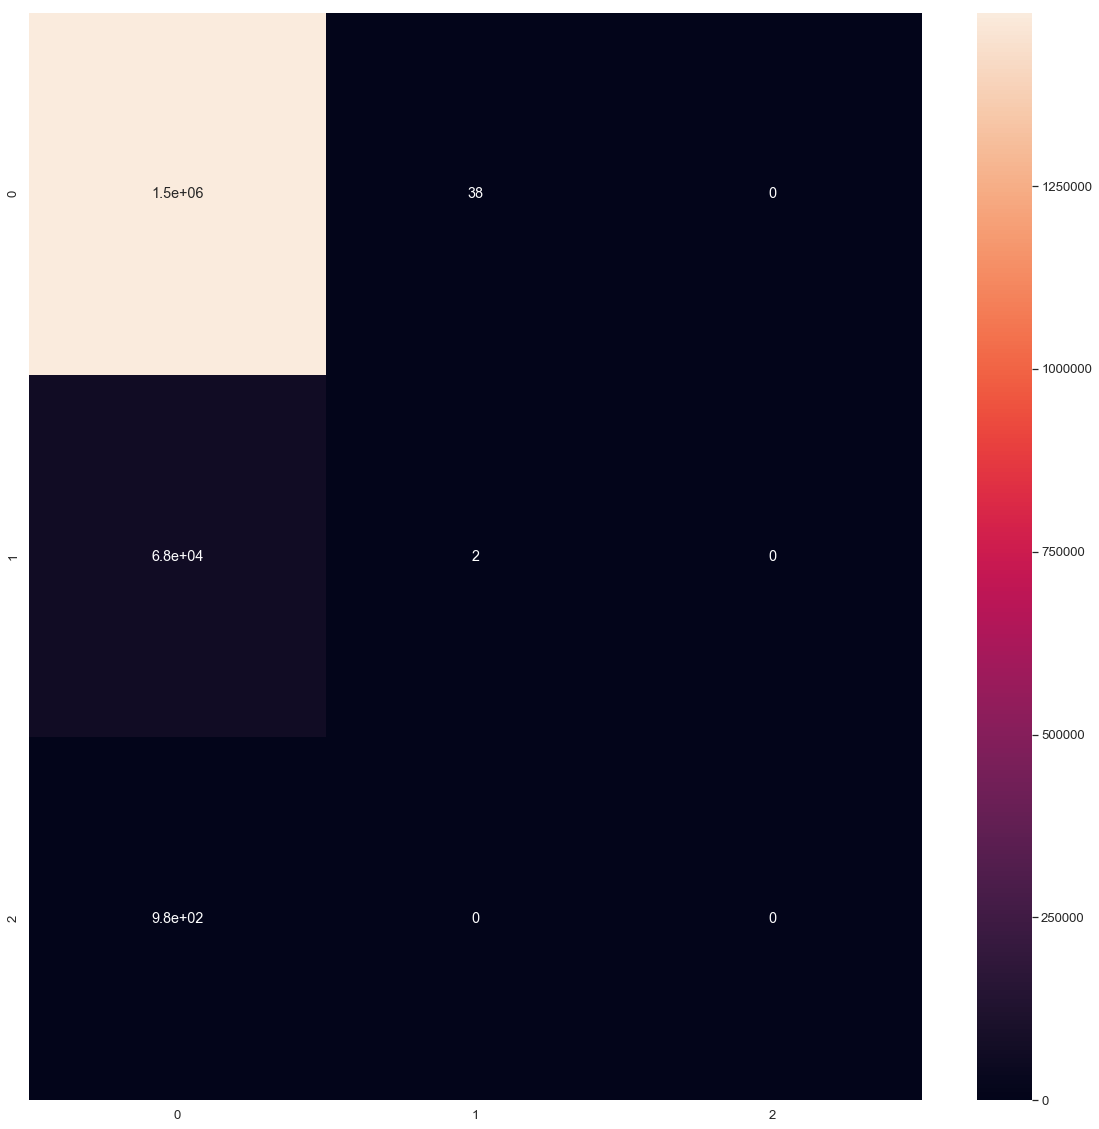

In [91]:
import seaborn as sns;sns.set(font_scale=1.2)
plt.figure(figsize = (20,20))
sns.heatmap(Knn_matrix, annot=True)
